# PCA Analysis on *Ostrea lurida*

In [9]:
library("adegenet") #for storing genetic data and running PCA
library("PCAviz")  #Visualizing output of PCA
library("cowplot") #Used with PCAviz

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## x45m75-maf025 combined

In [2]:
load("../Inputs/OL-c85t10-x45m75-maf025-u.genind")
stratted.u

/// GENIND OBJECT /////////

 // 117 individuals; 6,191 loci; 12,382 alleles; size: 8.9 Mb

 // Basic content
   @tab:  117 x 12382 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 12382 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


A function to fill in missing data. At each locus, for each individual missing data at that locus, it randomly draws two alleles from the **rangewide, overall** allele frequency.

In [2]:
NA.afDraw<- function(ind){
  ind.mat <- ind@tab
  new.mat <- ind.mat
  af = colSums(ind.mat[,seq(1,ncol(ind.mat)-1,2)],na.rm = TRUE)/
      (2*apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],2,function(x) sum(!is.na(x))))
  af.Draw <- function(geno, af){
     new <- function(geno,af){
        if(is.na(geno)){
        newA = rbinom(1,2,af)
        }
        else {newA <- geno}
        return(newA)
   }
  new.row <- mapply(geno,af,FUN = new)
  return(new.row)}
  
  new.mat[,seq(1,ncol(ind.mat)-1,2)] <- t(apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],1,af.Draw,af))
  new.mat[,seq(2,ncol(ind.mat),2)] <- 2-new.mat[,seq(1,ncol(ind.mat)-1,2)]
  new.ind <- ind
  new.ind@tab <- new.mat
  return(new.ind)
}

In [4]:
u.na <- NA.afDraw(stratted.u)

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = u.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = NA)



ERROR: Error in if (nf <= 0) nf <- 2: missing value where TRUE/FALSE needed


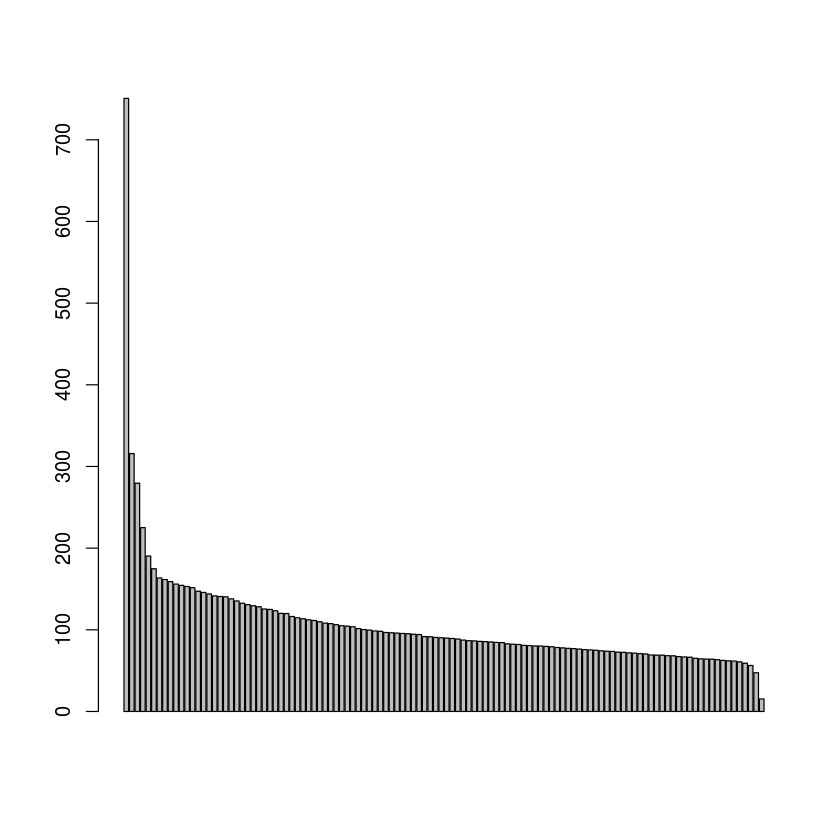

In [5]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = T)

In [ ]:
levels(strata(u.na)$REGION)

In [6]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = F, nf = 30)

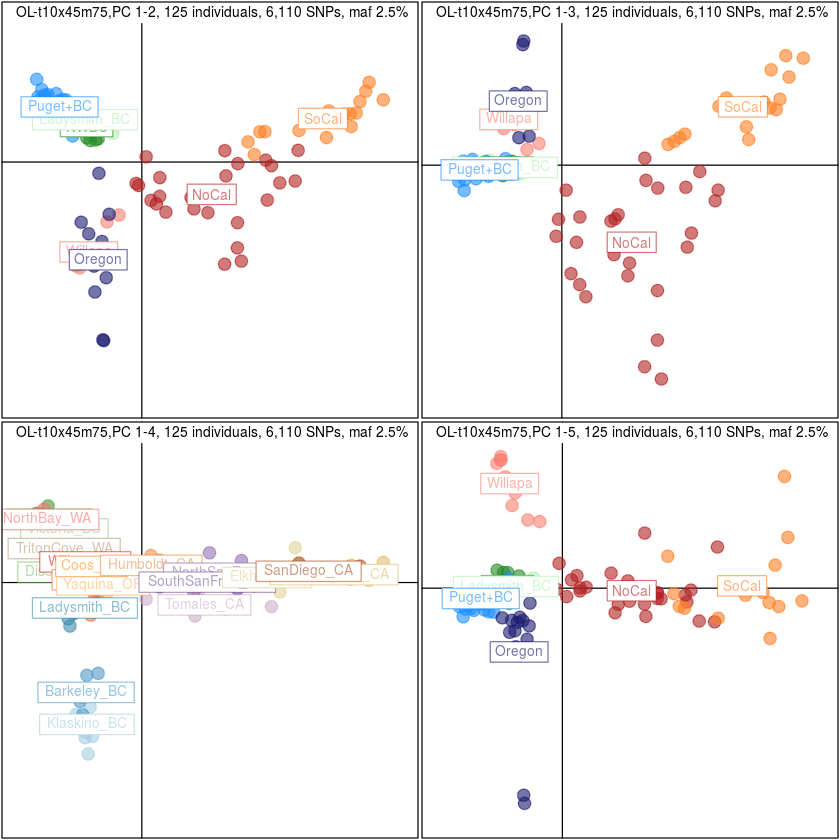

In [10]:
col18 <- funky(length(unique(u.na@strata$POPULATION)))
#Colors that match the neutral Structure results
col6 <-  c("forestgreen", "darkseagreen2", "dodgerblue", "salmon", "midnightblue", "firebrick","chocolate1")


par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=2, 
        sub = "OL-t10x45m75,PC 1-2, 125 individuals, 6,110 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=3, 
        sub = "OL-t10x45m75,PC 1-3, 125 individuals, 6,110 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=4, 
        sub = "OL-t10x45m75,PC 1-4, 125 individuals, 6,110 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col18,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=5, 
        sub = "OL-t10x45m75,PC 1-5, 125 individuals, 6,110 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

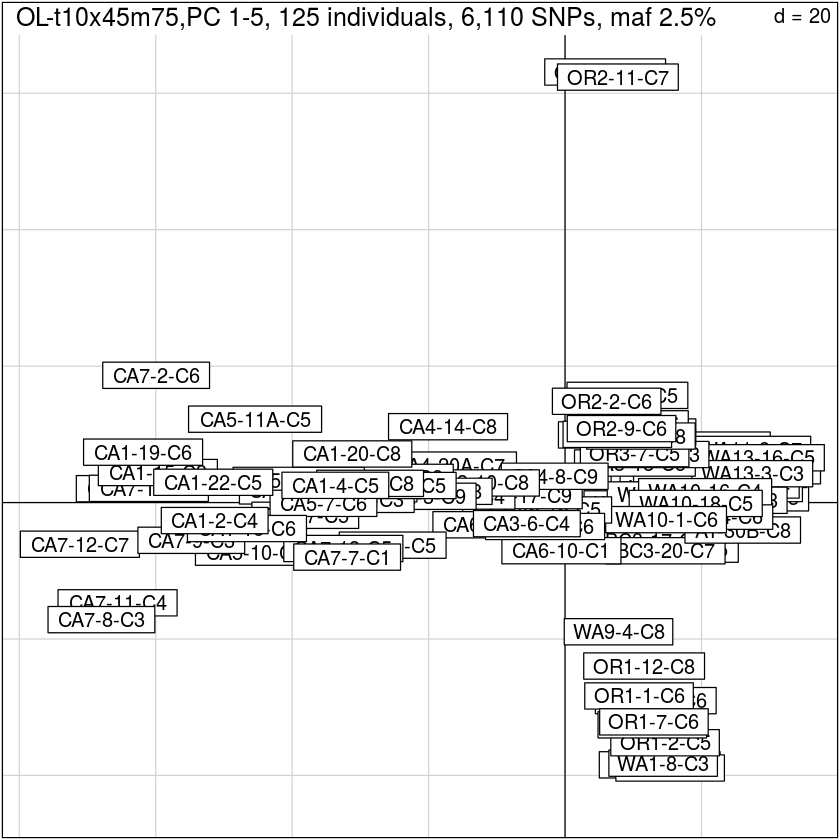

In [17]:
s.label(pca$li, xax=1,yax=5, 
        sub = "OL-t10x45m75,PC 1-5, 125 individuals, 6,110 SNPs, maf 2.5%",
        possub = "topleft")

Get percent contribution of each PC 

In [11]:
eig.perc <- 100*pca$eig/sum(pca$eig)
head(eig.perc)

[1] 6.062818 2.550640 2.257703 1.817804 1.537202 1.411246

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [12]:
li <-pca$li
c1 <- pca$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(u.na$strata, u.na$other$LATITUDE,u.na$other$LONGITUDE))
colnames(info_mat) <- c("Population","Location","Region","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

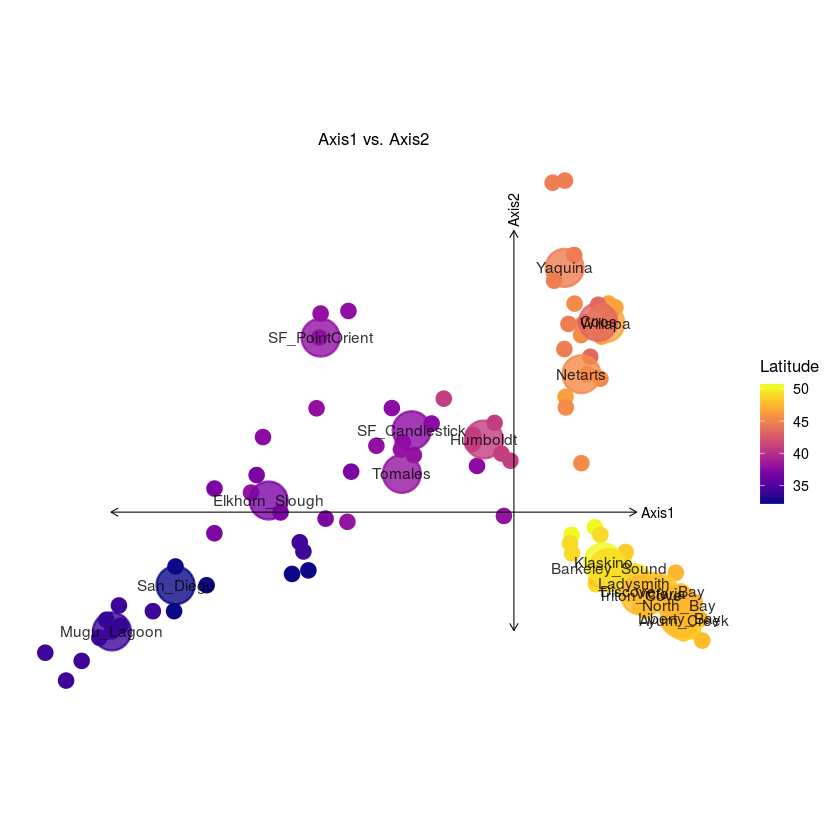

In [20]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = T, draw.pc.axes = T, geom.point.params = p)

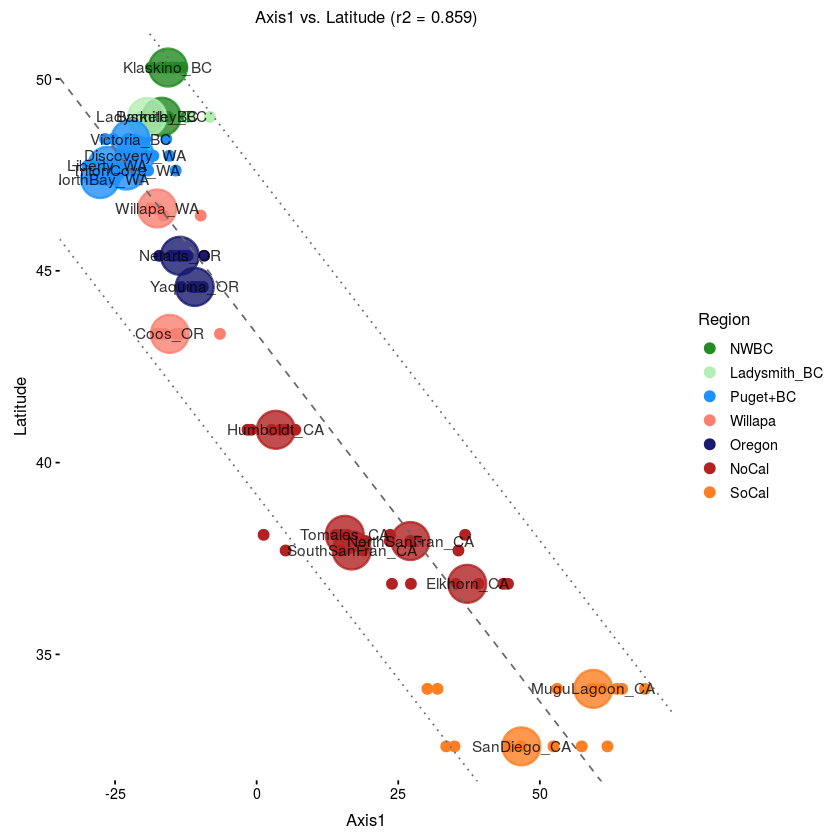

In [13]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = T)

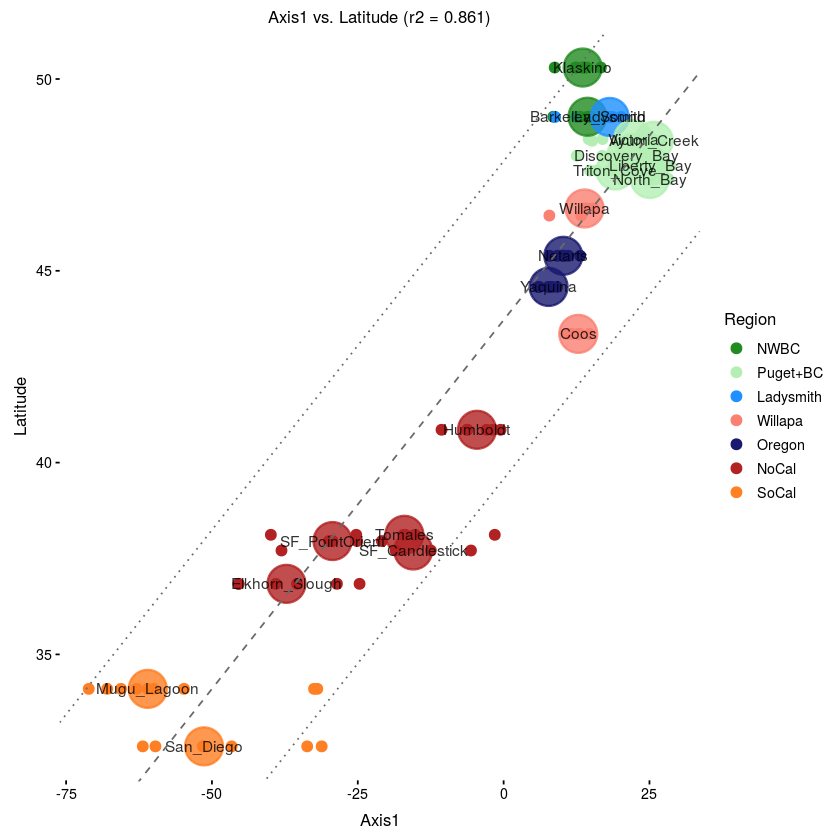

In [21]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = T)

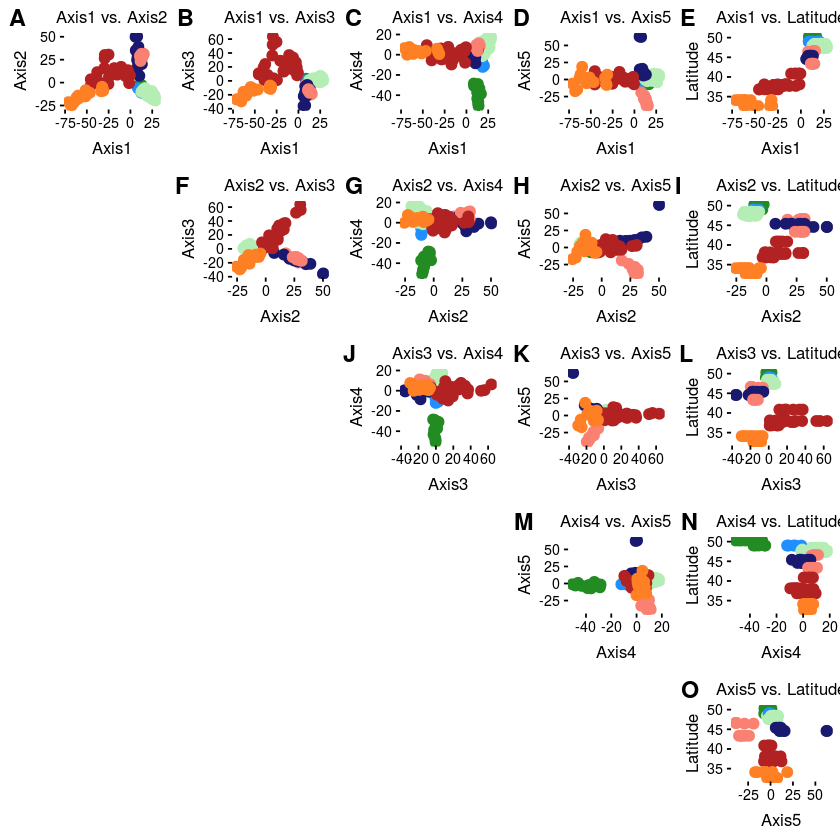

In [22]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",colors = col6,draw.points = T,scale.pc.axes = 0.6, show.legend=F)

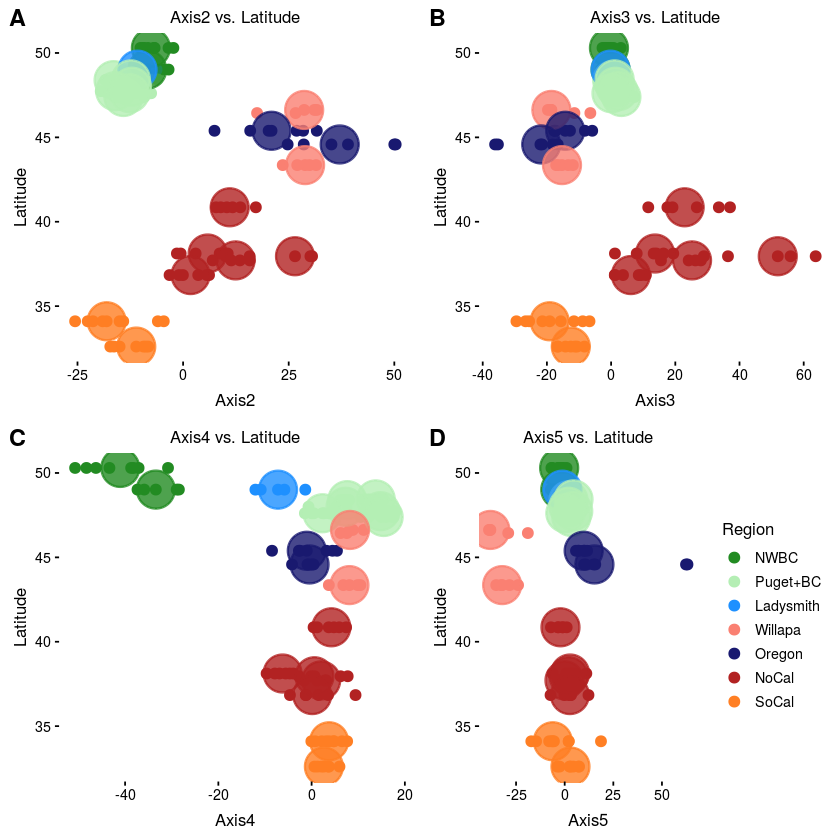

In [23]:
p = list(size=6)
A2 <- plot(pviz,coords = c("Axis2","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,draw.points =T,
     group.summary.labels = F,draw.linear.fit = F, coord_fixed=T)
A3 <- plot(pviz,coords = c("Axis3","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A4 <- plot(pviz,coords = c("Axis4","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A5 <- plot(pviz,coords = c("Axis5","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
plot_grid(A2,A3,A4,A5, labels = c('A','B','C','D'))

## x45m75 neutI2

In [20]:
load("../Inputs/OL-c85t10-x45m75-maf025-neutI2-u.genind")
stratted.u

/// GENIND OBJECT /////////

 // 117 individuals; 6,094 loci; 12,188 alleles; size: 8.8 Mb

 // Basic content
   @tab:  117 x 12188 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 12188 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


A function to fill in missing data. At each locus, for each individual missing data at that locus, it randomly draws two alleles from the **rangewide, overall** allele frequency.

In [21]:
NA.afDraw<- function(ind){
  ind.mat <- ind@tab
  new.mat <- ind.mat
  af = colSums(ind.mat[,seq(1,ncol(ind.mat)-1,2)],na.rm = TRUE)/
      (2*apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],2,function(x) sum(!is.na(x))))
  af.Draw <- function(geno, af){
     new <- function(geno,af){
        if(is.na(geno)){
        newA = rbinom(1,2,af)
        }
        else {newA <- geno}
        return(newA)
   }
  new.row <- mapply(geno,af,FUN = new)
  return(new.row)}
  
  new.mat[,seq(1,ncol(ind.mat)-1,2)] <- t(apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],1,af.Draw,af))
  new.mat[,seq(2,ncol(ind.mat),2)] <- 2-new.mat[,seq(1,ncol(ind.mat)-1,2)]
  new.ind <- ind
  new.ind@tab <- new.mat
  return(new.ind)
}

In [22]:
u.na <- NA.afDraw(stratted.u)

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = u.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = NA)



ERROR: Error in if (nf <= 0) nf <- 2: missing value where TRUE/FALSE needed


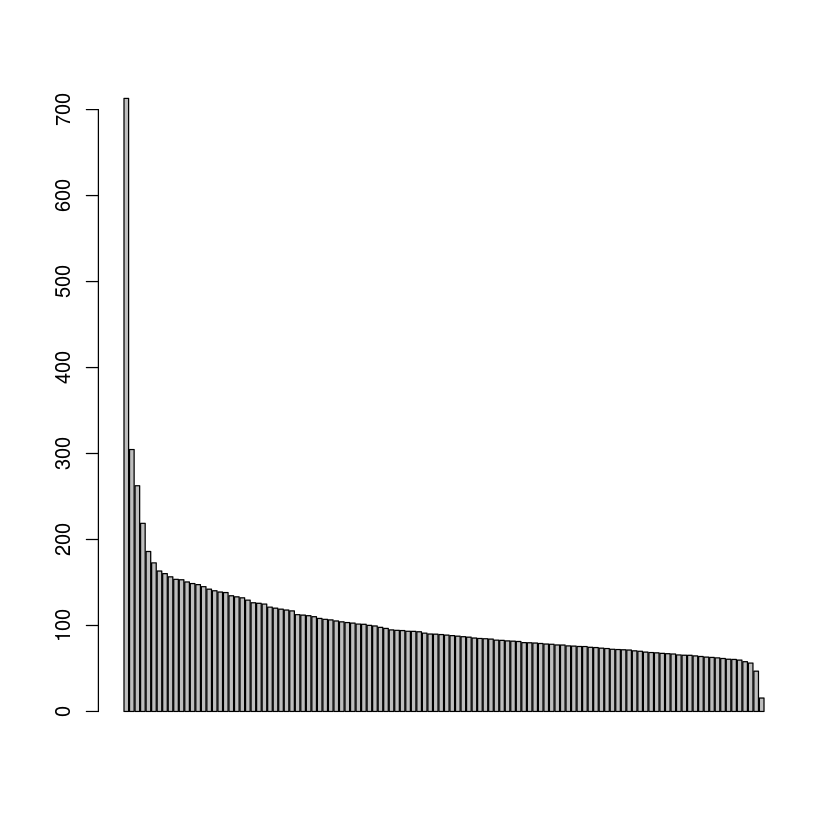

In [23]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = T)

In [24]:
levels(strata(u.na)$REGION)

[1] "NWBC"     "Puget+BC" "Willapa"  "Oregon"   "NoCal"    "SoCal"

In [25]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = F, nf = 30)

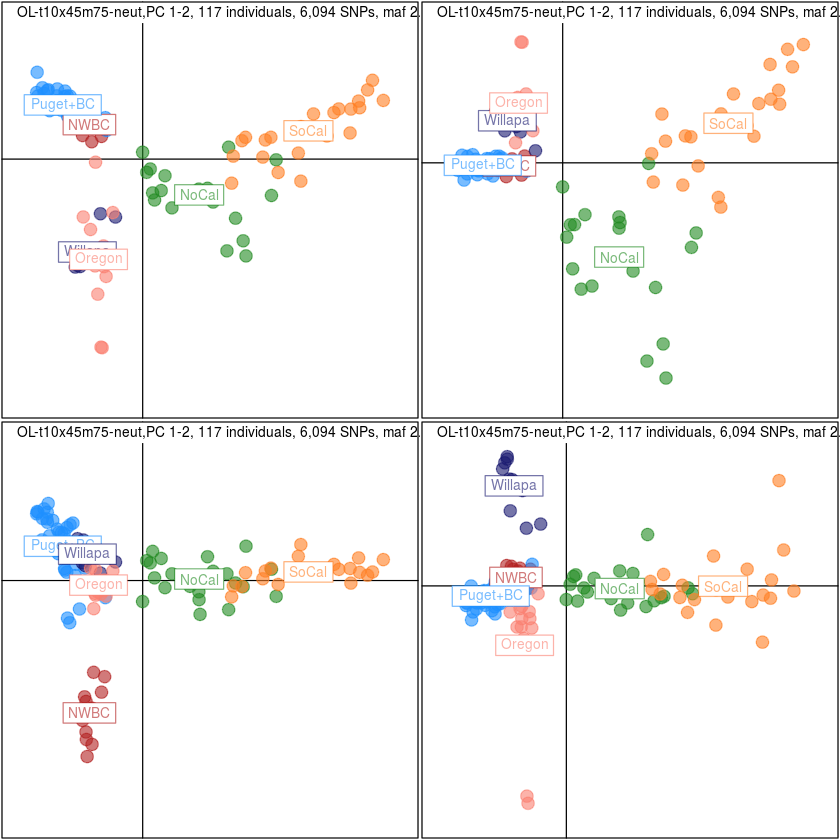

In [27]:
col18 <- funky(length(unique(u.na@strata$POPULATION)))
#Colors that match the neutral Structure results
col6 <-  c("firebrick","dodgerblue","midnightblue","salmon","forestgreen","chocolate1")

par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=2, 
        sub = "OL-t10x45m75-neut,PC 1-2, 117 individuals, 6,094 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=3, 
        sub = "OL-t10x45m75-neut,PC 1-2, 117 individuals, 6,094 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=4, 
        sub = "OL-t10x45m75-neut,PC 1-2, 117 individuals, 6,094 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=5, 
        sub = "OL-t10x45m75-neut,PC 1-2, 117 individuals, 6,094 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

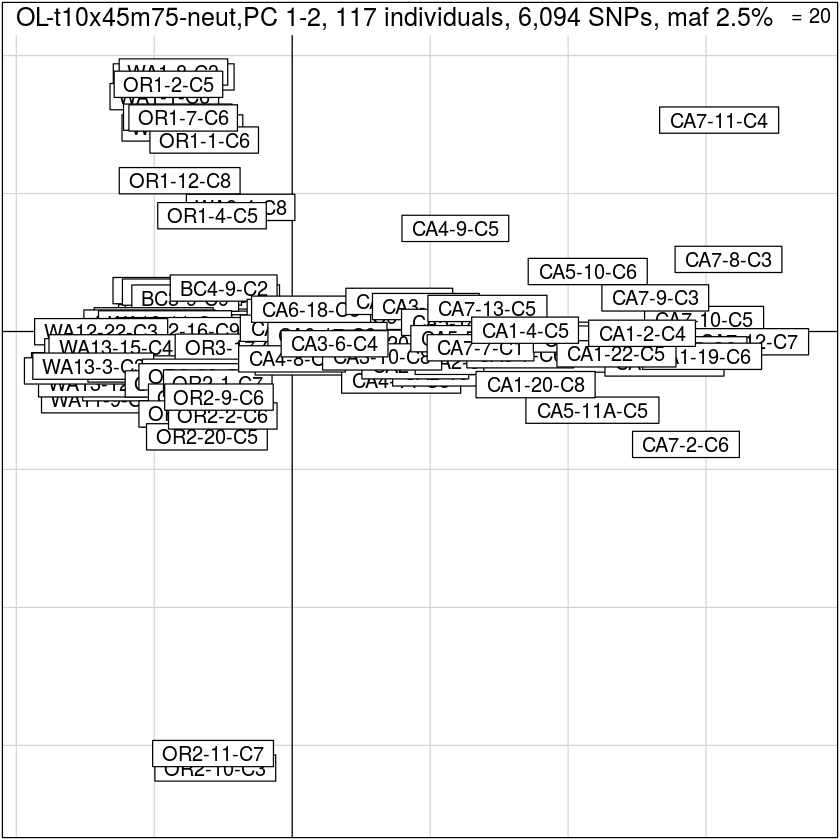

In [28]:
s.label(pca$li, xax=1,yax=5, 
        sub = "OL-t10x45m75-neut,PC 1-2, 117 individuals, 6,094 SNPs, maf 2.5%",
        possub = "topleft")

Get percent contribution of each PC 

In [29]:
eig.perc <- 100*pca$eig/sum(pca$eig)
head(eig.perc)

[1] 5.850188 2.499580 2.154040 1.795232 1.526415 1.418063

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [30]:
li <-pca$li
c1 <- pca$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(u.na$strata, u.na$other$LATITUDE,u.na$other$LONGITUDE))
colnames(info_mat) <- c("Population","Location","Region","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

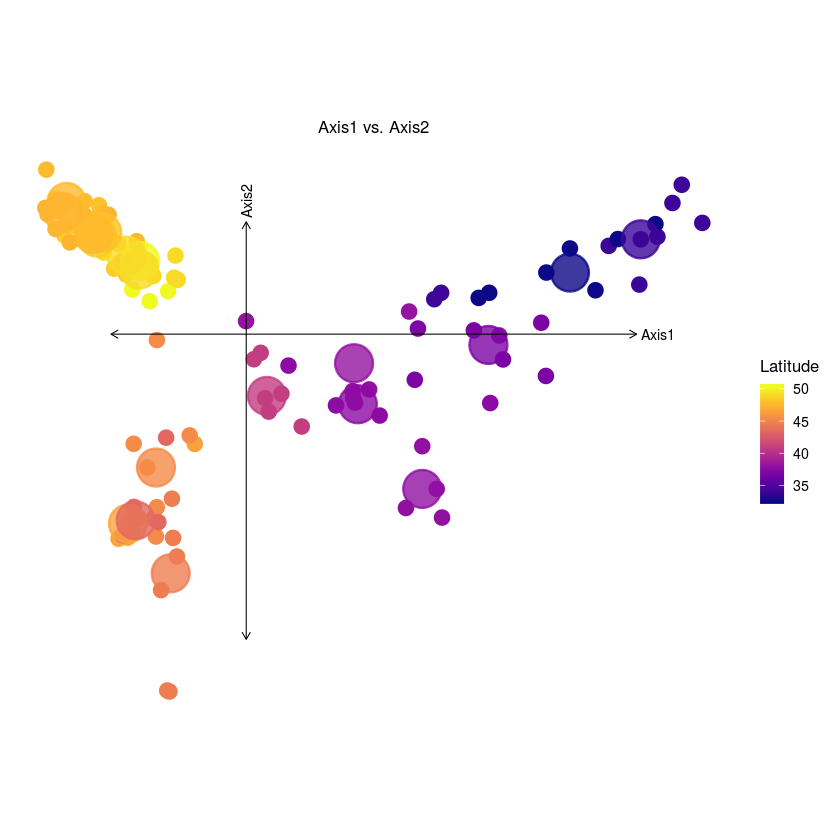

In [31]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = F, draw.pc.axes = T, geom.point.params = p)

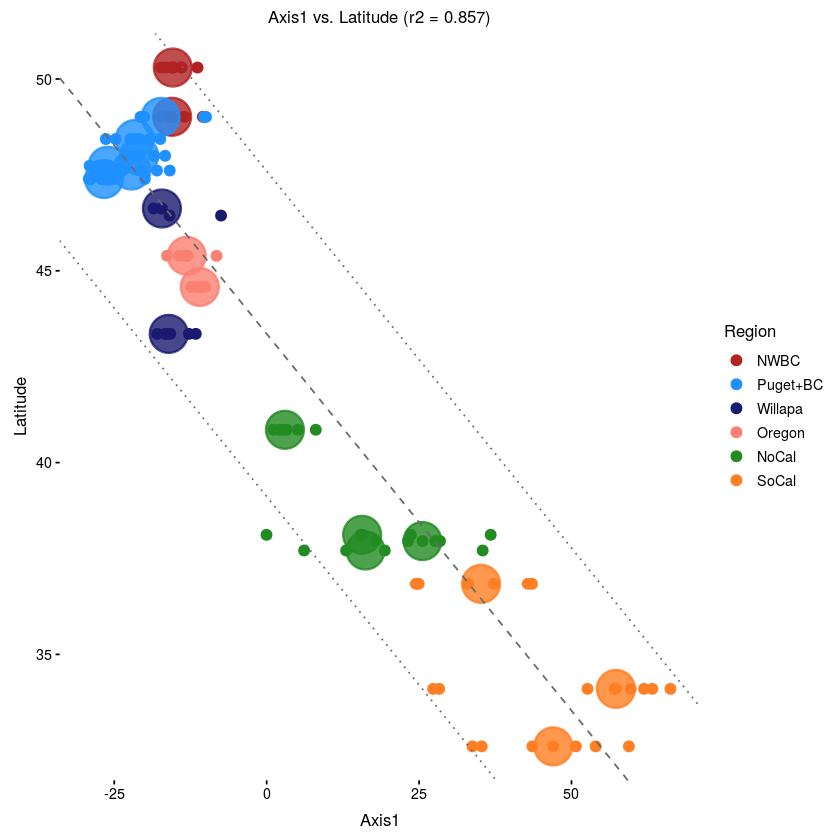

In [58]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F)

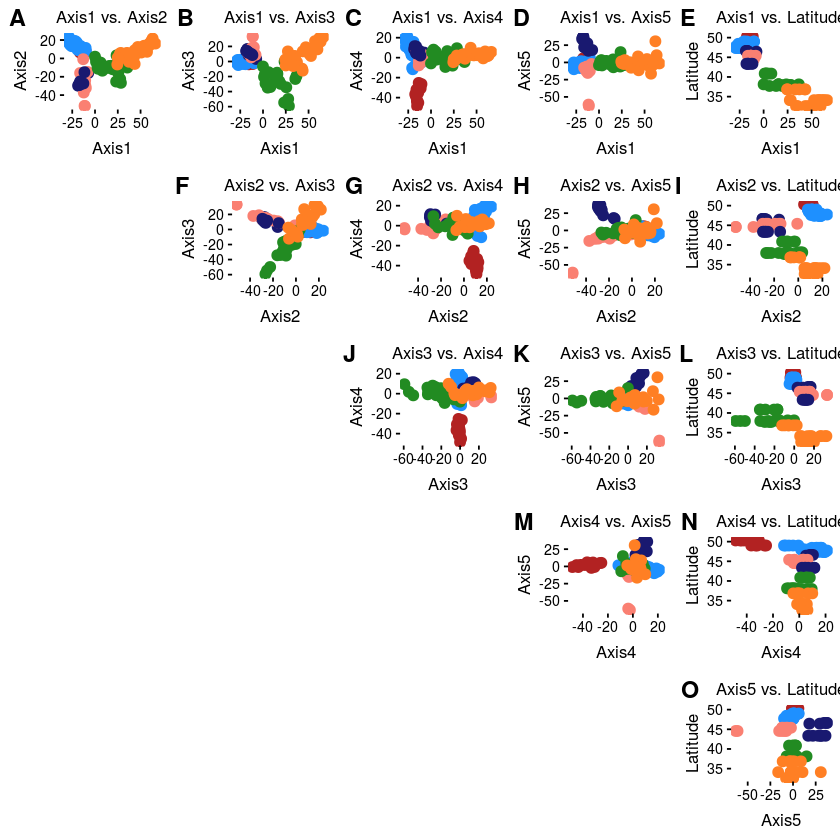

In [33]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",colors = col6,draw.points = T,scale.pc.axes = 0.6, show.legend=F)

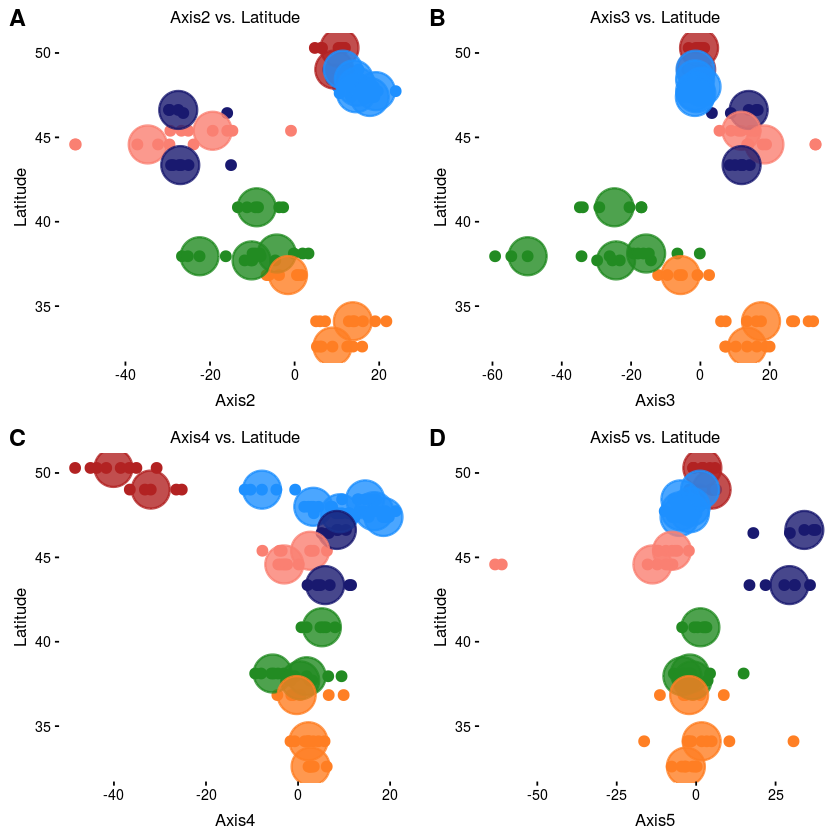

In [56]:
p = list(size=6)
A2 <- plot(pviz,coords = c("Axis2","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,draw.points =T,
     group.summary.labels = F,draw.linear.fit = F, coord_fixed=T)
A3 <- plot(pviz,coords = c("Axis3","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A4 <- plot(pviz,coords = c("Axis4","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A5 <- plot(pviz,coords = c("Axis5","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
plot_grid(A2,A3,A4,A5, labels = c('A','B','C','D'))

## x45m75-outI2

In [14]:
load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-u.genind")
stratted.u

/// GENIND OBJECT /////////

 // 117 individuals; 97 loci; 194 alleles; size: 165 Kb

 // Basic content
   @tab:  117 x 194 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 194 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


A function to fill in missing data. At each locus, for each individual missing data at that locus, it randomly draws two alleles from the **rangewide, overall** allele frequency.

In [15]:
out.na <- NA.afDraw(stratted.u)

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = out.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = integer(0))



ERROR: Error in if (nf <= 0) nf <- 2: argument is of length zero


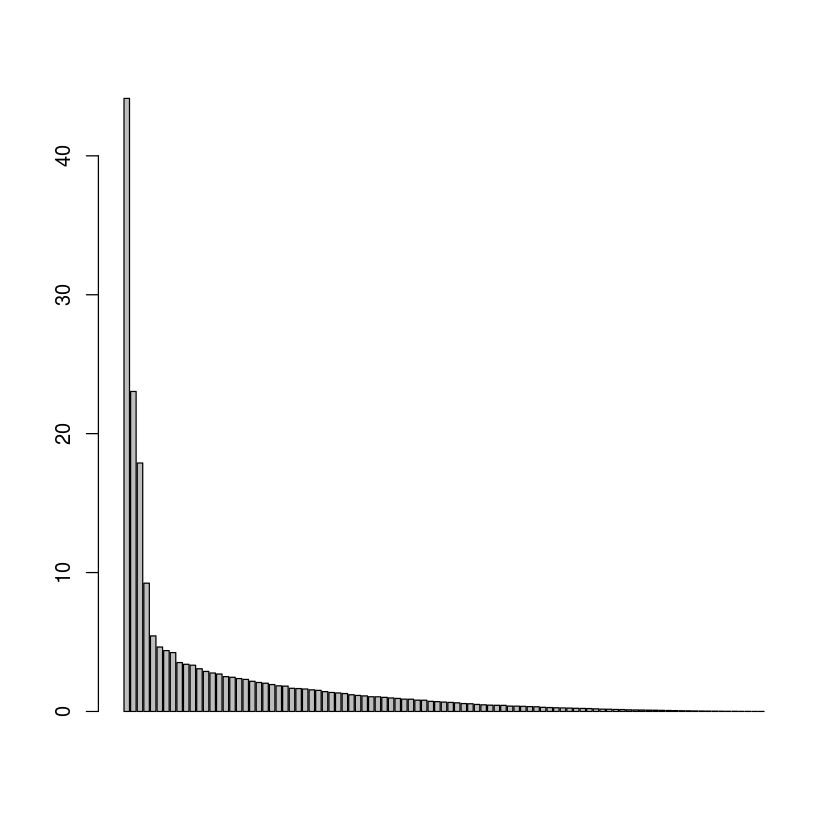

In [16]:
pca <- dudi.pca(out.na,cent=TRUE,scale=TRUE,scannf = T)

In [17]:
pca.out <- dudi.pca(out.na,cent=TRUE,scale=TRUE,scannf = F, nf = 30)

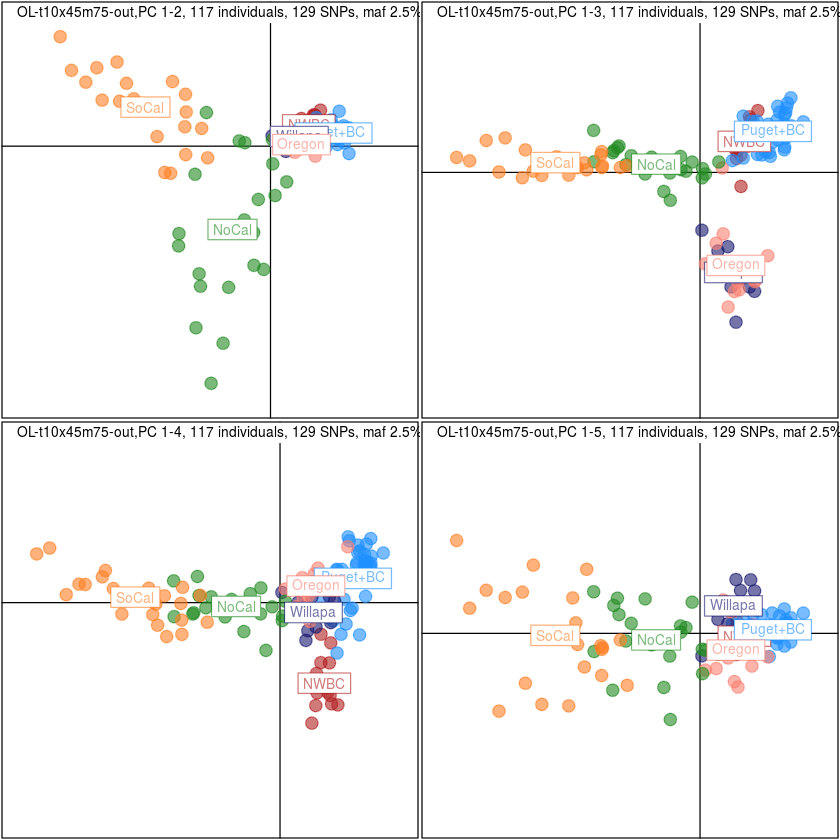

In [18]:
col18 <- funky(length(unique(out.na@strata$POPULATION)))
#Colors that match the neutral Structure results
col6 <-  c("firebrick","dodgerblue","midnightblue","salmon","forestgreen","chocolate1")

par(mfrow=c(2,2))
s.class(pca.out$li, strata(out.na)$REGION,xax=1,yax=2, 
        sub = "OL-t10x45m75-out,PC 1-2, 117 individuals, 129 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.out$li, strata(out.na)$REGION,xax=1,yax=3, 
        sub = "OL-t10x45m75-out,PC 1-3, 117 individuals, 129 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.out$li, strata(out.na)$REGION,xax=1,yax=4, 
        sub = "OL-t10x45m75-out,PC 1-4, 117 individuals, 129 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.out$li, strata(out.na)$REGION,xax=1,yax=5, 
        sub = "OL-t10x45m75-out,PC 1-5, 117 individuals, 129 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

Get percent contribution of each PC 

In [19]:
eig.perc <- 100*pca.out$eig/sum(pca.out$eig)
head(eig.perc)

[1] 22.750028 11.874524  9.220630  4.760323  2.804348  2.391051

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [20]:
li <-pca.out$li
c1 <- pca.out$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(out.na$strata, out.na$other$LATITUDE,out.na$other$LONGITUDE))
colnames(info_mat) <- c("Population","Location","Region","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz.out <- pcaviz(x=li,rotation=c1,dat=info_mat)

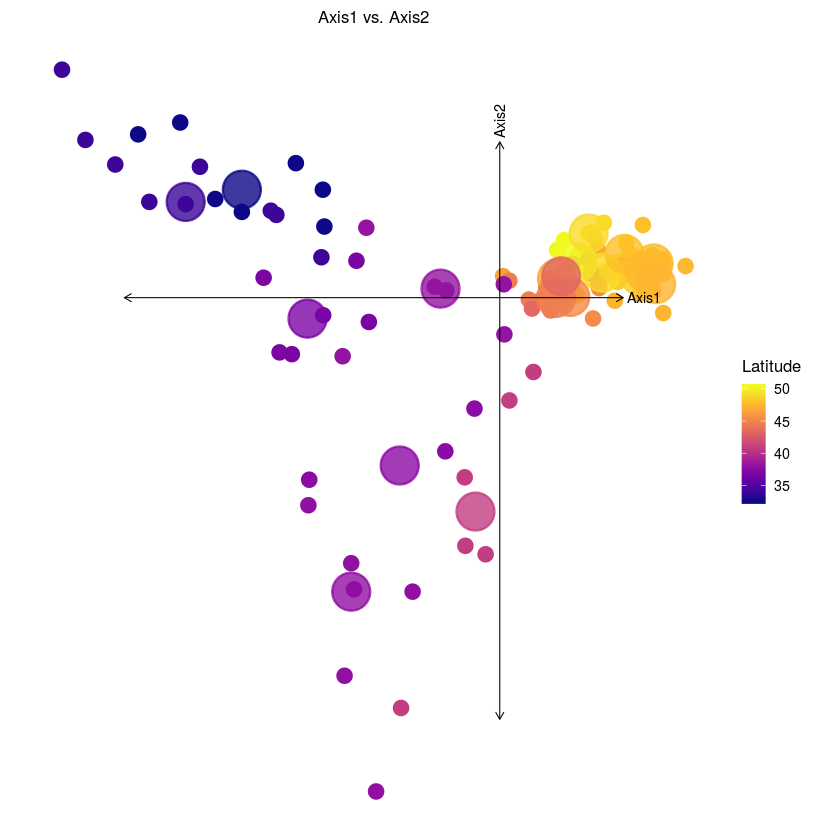

In [21]:
p = list(size=4) 
plot(pviz.out,color = "Latitude", draw.points = T, group.summary.labels = F, draw.pc.axes = T, geom.point.params = p)

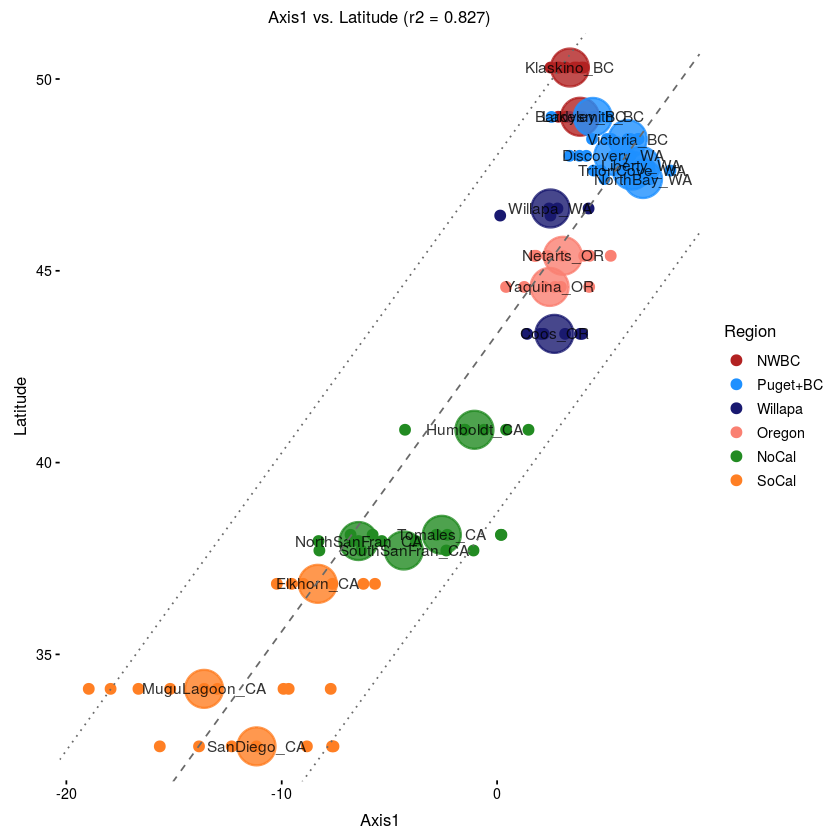

In [22]:
p = list(size=6)
plot(pviz.out,coords = c("Axis1","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = T)

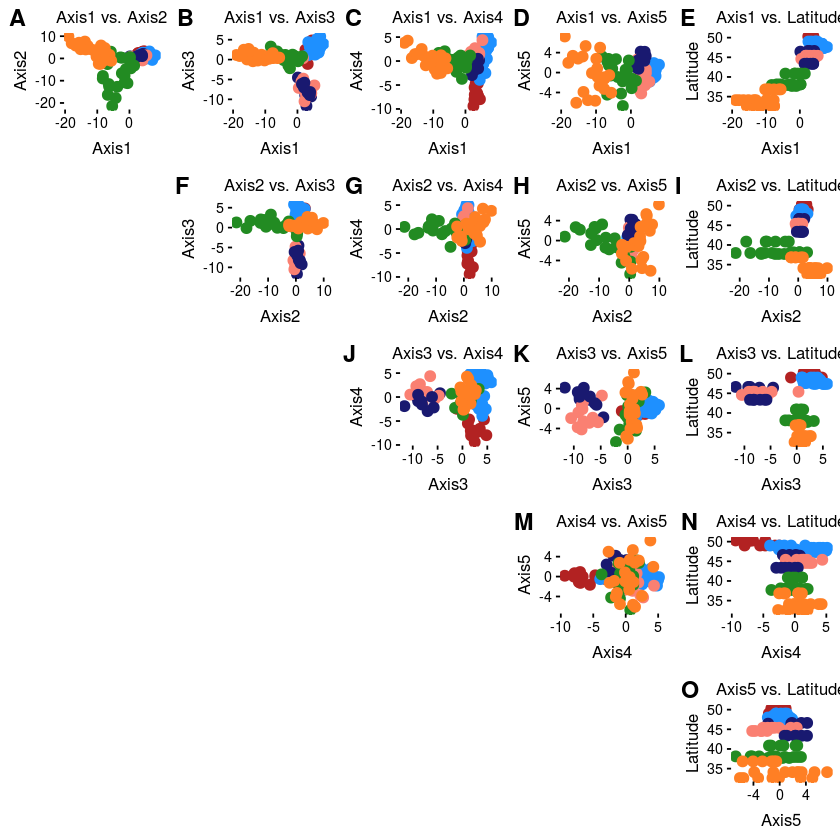

In [23]:
plot(pviz.out,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",colors = col6,draw.points = T,scale.pc.axes = 0.6, show.legend=F)

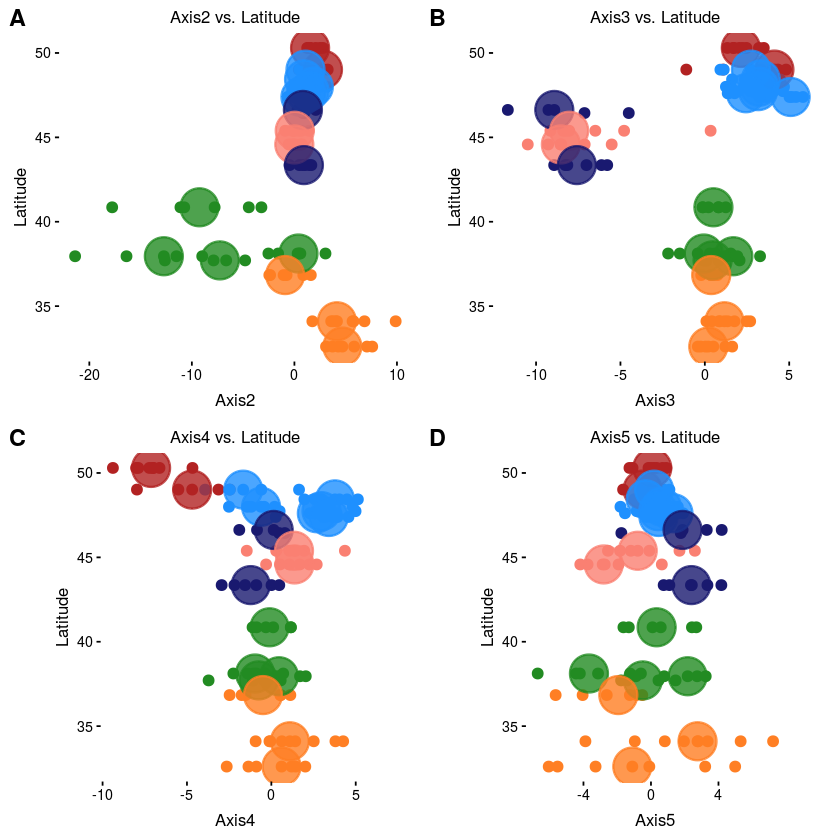

In [24]:
p = list(size=6)
A2 <- plot(pviz.out,coords = c("Axis2","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,draw.points =T,
     group.summary.labels = F,draw.linear.fit = F, coord_fixed=T)
A3 <- plot(pviz.out,coords = c("Axis3","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A4 <- plot(pviz.out,coords = c("Axis4","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A5 <- plot(pviz.out,coords = c("Axis5","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
plot_grid(A2,A3,A4,A5, labels = c('A','B','C','D'))